### 线性回归、套索回归（Lasso 回归）和岭回归的数学模型：

**一、线性回归**

线性回归试图找到一个线性方程来拟合输入变量（特征）和输出变量（目标）之间的关系。

对于一个有 $n$ 个样本，每个样本有 $p$ 个特征的数据集，线性回归模型可以表示为：

$\hat{y}=w_0 + w_1x_1 + w_2x_2 +... + w_px_p$

其中，$\hat{y}$ 是预测值，$x_1,x_2,...,x_p$ 是输入特征，$w_0,w_1,w_2,...,w_p$ 是待估计的参数（权重）。

在最小二乘法中，目标是最小化残差平方和（RSS）：

$RSS=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-(w_0 + w_1x_{i1} + w_2x_{i2} +... + w_px_{ip}))^2$

通过对 RSS 关于参数 $w_0,w_1,...,w_p$ 求偏导并令其为零，可以得到参数的估计值。

**二、套索回归（Lasso 回归）**

Lasso 回归在线性回归的基础上加入了 L1 正则化项。

模型表达式为：

$\hat{y}=w_0 + w_1x_1 + w_2x_2 +... + w_px_p$

目标函数为：

$\min_{w}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2+\lambda\sum_{j=1}^{p}|w_j|$

其中，$\lambda$ 是正则化参数，用于控制正则化的强度。L1 正则化项 $\sum_{j=1}^{p}|w_j|$ 的作用是使得一些参数变为零，从而实现特征选择。

**三、岭回归**

岭回归在线性回归的基础上加入了 L2 正则化项。

模型表达式与线性回归相同：

$\hat{y}=w_0 + w_1x_1 + w_2x_2 +... + w_px_p$

目标函数为：

$\min_{w}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2+\lambda\sum_{j=1}^{p}w_j^2$

这里的 $\lambda$ 同样是正则化参数。L2 正则化项 $\sum_{j=1}^{p}w_j^2$ 使得参数趋向于较小的值，但不会使其为零，它可以防止过拟合并提高模型的稳定性。

### 观察三种回归的权重

In [2]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 生成模拟数据
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# 原始线性回归
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_weights = linear_reg.coef_
print("原始线性回归权重：", linear_weights)

# 岭回归
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X, y)
ridge_weights = ridge_reg.coef_
print("岭回归权重：", ridge_weights)

# 套索回归
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X, y)
lasso_weights = lasso_reg.coef_
print("套索回归权重：", lasso_weights)

原始线性回归权重： [58.18101105 65.26577857 90.08449437 42.88789488 43.18659873 79.73428326
 43.12720688 29.62732849 53.81928896 49.43676792]
岭回归权重： [57.1408258  64.13723402 88.73021333 42.15837535 42.39344563 78.51492078
 42.91807705 29.06485707 52.88149152 49.06920713]
套索回归权重： [56.36553553 63.49621733 88.26589104 41.56866948 41.64071325 77.98128104
 42.54167658 28.20038127 52.10484354 48.62967873]


### 三种回归权重绘制成表格及可视化

     Variable  Linear Regression  Ridge Regression  Lasso Regression
0  Variable_0          96.794940         87.568579         85.992015
1  Variable_1          69.416703         62.886105         59.345628
2  Variable_2          27.735752         25.461411         18.501695
3  Variable_3          39.863793         36.037045         29.700059
4  Variable_4          95.536531         87.146419         85.850480


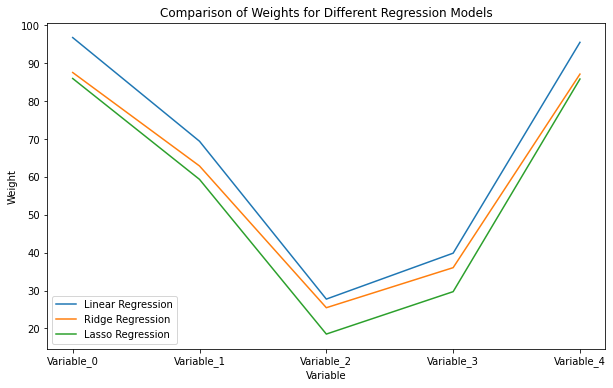

In [8]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import matplotlib.pyplot as plt

# 生成模拟数据
X, y = make_regression(n_samples=1000, n_features=5, noise=0.5)

# 原始线性回归
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_weights = linear_reg.coef_

# 岭回归
ridge_reg = Ridge(alpha=100)
ridge_reg.fit(X, y)
ridge_weights = ridge_reg.coef_

# 套索回归
lasso_reg = Lasso(alpha=10)
lasso_reg.fit(X, y)
lasso_weights = lasso_reg.coef_

# 创建数据表格
data = {
    'Variable': [f'Variable_{i}' for i in range(len(linear_weights))],
    'Linear Regression': linear_weights,
    'Ridge Regression': ridge_weights,
    'Lasso Regression': lasso_weights
}
df = pd.DataFrame(data)

# 打印表格
print(df)

# 绘制变量权重对比图示
plt.figure(figsize=(10, 6))
plt.plot(np.array(df['Variable']), np.array(df['Linear Regression']), label='Linear Regression')
plt.plot(np.array(df['Variable']), np.array(df['Ridge Regression']), label='Ridge Regression')
plt.plot(np.array(df['Variable']), np.array(df['Lasso Regression']), label='Lasso Regression')
plt.xlabel('Variable')
plt.ylabel('Weight')
plt.title('Comparison of Weights for Different Regression Models')
plt.legend()
plt.show()

### 分析参数alpha 值对回归模型权重的影响

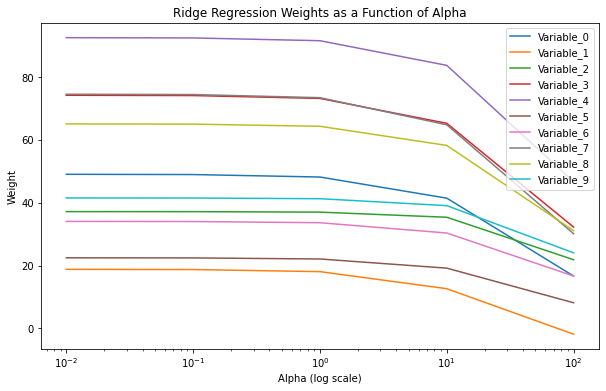

In [9]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# 生成模拟数据
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

# 不同的 alpha 值
alphas = [0.01, 0.1, 1, 10, 100]

weights = []

# 对于每个 alpha 值，训练岭回归模型并获取权重
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    weights.append(ridge.coef_)

# 绘制权重随 alpha 变化的图示
plt.figure(figsize=(10, 6))
for i in range(len(weights[0])):
    plt.plot(alphas, [w[i] for w in weights], label=f'Variable_{i}')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Weight')
plt.title('Ridge Regression Weights as a Function of Alpha')
plt.legend()
plt.show()

Linear Regression MSE: 9913.605049661151
Ridge Regression MSE: 9916.21957769611
Lasso Regression MSE: 9917.806913956278


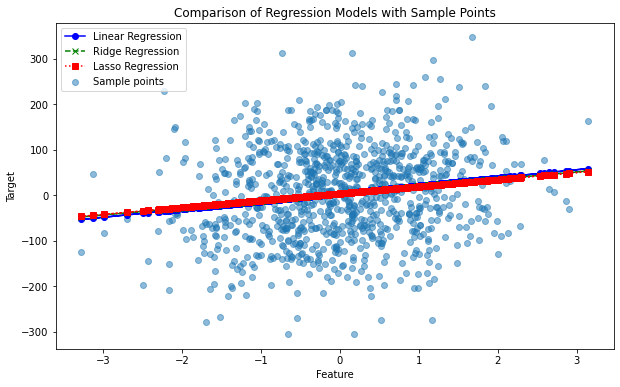

In [26]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 生成模拟数据
X, y = make_regression(n_samples=1000, n_features=1, noise=100)

# 原始线性回归
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_pred = linear_reg.predict(X)
linear_mse = mean_squared_error(y, linear_pred)

# 岭回归
ridge_reg = Ridge(alpha=100)
ridge_reg.fit(X, y)
ridge_pred = ridge_reg.predict(X)
ridge_mse = mean_squared_error(y, ridge_pred)

# 套索回归
lasso_reg = Lasso(alpha=2)
lasso_reg.fit(X, y)
lasso_pred = lasso_reg.predict(X)
lasso_mse = mean_squared_error(y, lasso_pred)

# 绘制样本点和模型
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Sample points')
plt.plot(X, linear_pred, label='Linear Regression', color='blue', linestyle='-', marker='o')
plt.plot(X, ridge_pred, label='Ridge Regression', color='green', linestyle='--', marker='x')
plt.plot(X, lasso_pred, label='Lasso Regression', color='red', linestyle=':', marker='s')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Comparison of Regression Models with Sample Points')
plt.legend()

# 输出预测误差
print(f"Linear Regression MSE: {linear_mse}")
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")

plt.show()